<a href="https://colab.research.google.com/github/Tristkick1234/ML-and-DL-tutorials-/blob/main/Clothesclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

# Clothing classification


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
#importing necessary libraries

2.12.0


In [ ]:
#going to import the minst dataset
fashion_mnist = tf.keras.datasets.fashion_mnist


#returns four numpy arrays split into training(learn) and testing sets
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
#each image has a label(number)
class_names =['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Exploring data


In [ ]:
#find shape of train data( format )
train_images.shape
#60000 images that are 28x 28

len(train_labels)
#60000 labels corresponding to images

60000

In [ ]:
train_labels
#how does it know which image is which? the dataset contains that info
test_images.shape
#10000 images
len(test_labels)

10000

#Preprocessing


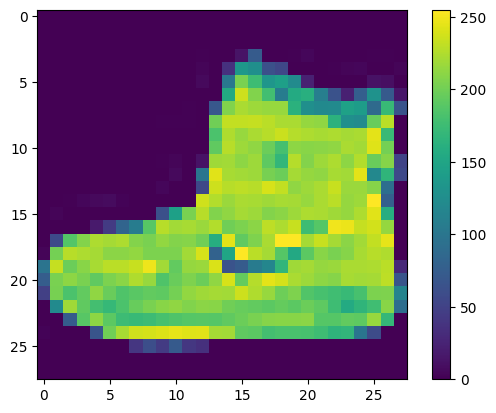

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
#pixel values from 0 to 255 but must bee on a scale from 0 to 1

In [ ]:
train_images = train_images/255.0
test_images= test_images/255.0
#training and testing processing same way

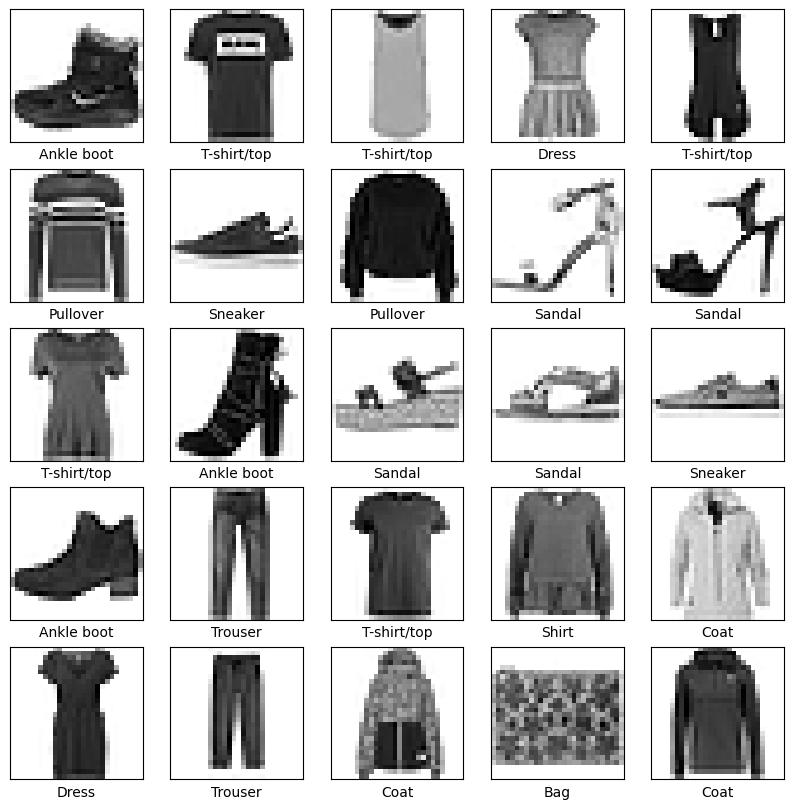

In [ ]:
#display first 25 images from training set and class name

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

#Build the model


###Setup layers


In [ ]:
#config layers and then compile model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    #split into rows and line them up, now two dense layers
    tf.keras.layers.Dense(128, activation='relu'),#why 128?
    #connected layers
    #each node contains a score indicating current image belongs to one of 10 classes
    tf.keras.layers.Dense(10)
])

###Compile

In [ ]:
model.compile(optimizer = 'adam', #how model is updated based off data and loss
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #how accurate the model is during training
              metrics=['accuracy']) #training and testing steps

#Train model


In [ ]:
#training data fed to model and it associate images with labels
model.fit(train_images,train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5035 - accuracy: 0.8214
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3744 - accuracy: 0.8647
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3376 - accuracy: 0.8773
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3123 - accuracy: 0.8848
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2944 - accuracy: 0.8918
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2800 - accuracy: 0.8957
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2673 - accuracy: 0.9013
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2560 - accuracy: 0.9046
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2471 - accuracy: 0.9079
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

In [ ]:
#evaluate accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels,verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3566 - accuracy: 0.8872 - 441ms/epoch - 1ms/step

Test accuracy: 0.8871999979019165


In [ ]:
#predictions, convert to probabilities

probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)


313/313 [==============================] - 0s 1ms/step


In [ ]:
#my test
predictions[0].max()

#prints first 11 predictions

sidelist = []
for x in range(10):
  indexofhighest = np.where(predictions[x] == predictions[x].max())

  print(class_names[indexofhighest[0][0]])



Ankle boot
Pullover
Trouser
Trouser
Shirt
Trouser
Coat
Shirt
Sandal
Sneaker


In [ ]:
test_labels[0]

9

In [ ]:
#graph to look at class predictions
def plot_image( i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == np.argmax(predictions_array):
    color='blue'
  else:
      color='red'


  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')






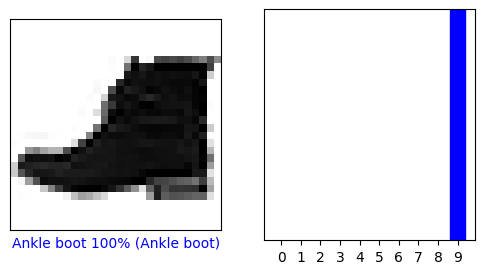

In [ ]:
i = 83
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

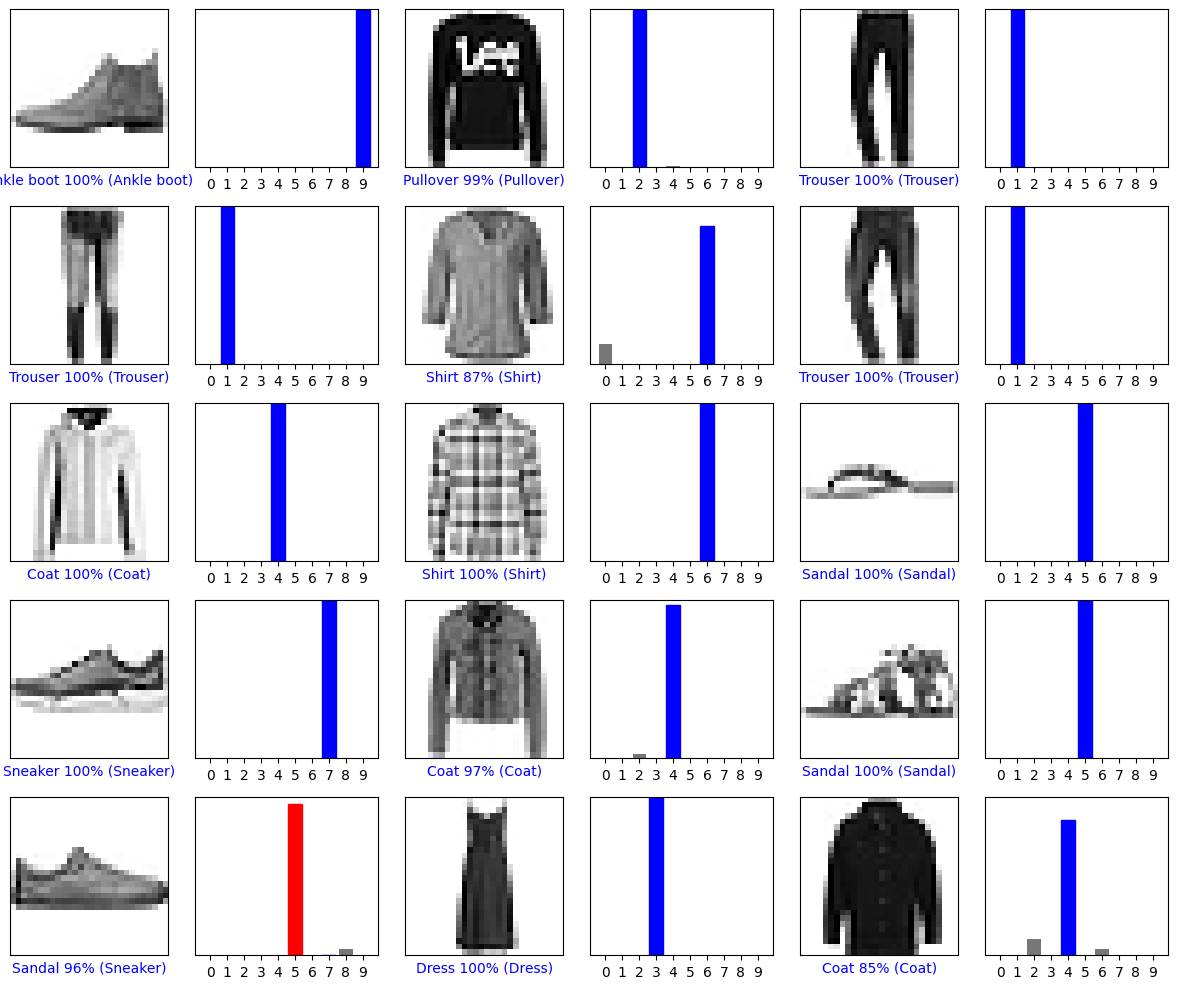

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#Using trained model

In [ ]:
img = test_images[1]
print(img.shape)

(28, 28)


In [ ]:
#batch prediction

img=  (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)


1/1 [==============================] - 0s 17ms/step
[[4.59520879e-06 9.54491360e-19 9.91210103e-01 1.48678949e-17
  8.67561810e-03 3.21216979e-19 1.09689536e-04 5.18105029e-20
  6.63951011e-15 1.74723749e-21]]


'Trouser'

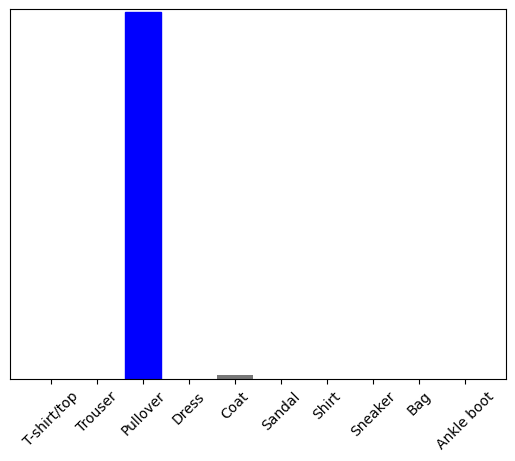

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
classindex= np.argmax(predictions_single[0])

print(class_names[classindex])

Pullover
